# FINTECH Lecture 9

In [1]:
from pylab import plt, mpl
%matplotlib inline
import math
import numpy as np

In [2]:
plt.style.use( "seaborn" )
mpl.rcParams[ 'font.family' ] = 'serif'

# Future Index Level in Black Scholes Merton setup

$S_T = S_0 \exp( ( r - \frac{1}{2}\sigma^2 )T + \sigma \sqrt{ T } z )$

In [3]:
# 生成指定随机数 seed是种子
np.random.seed(100)

In [4]:
S0 = 100
r = 0.05
sigma = 0.25
T = 2.0
# 随机数个数
I = 10000

In [5]:
# exp是e^ sqrt是求非负平方根
ST1 = S0 * np.exp( ( r - 0.5 * sigma ** 2 ) * T + \
    sigma * np.sqrt( T ) * np.random.randn( I ) )
ST1

array([ 55.9262954 , 117.19345191, 156.07394533, ...,  88.58161358,
       134.5220731 ,  96.3859061 ])

In [6]:
ST1.shape

(10000,)

Text(0, 0.5, 'frequency')

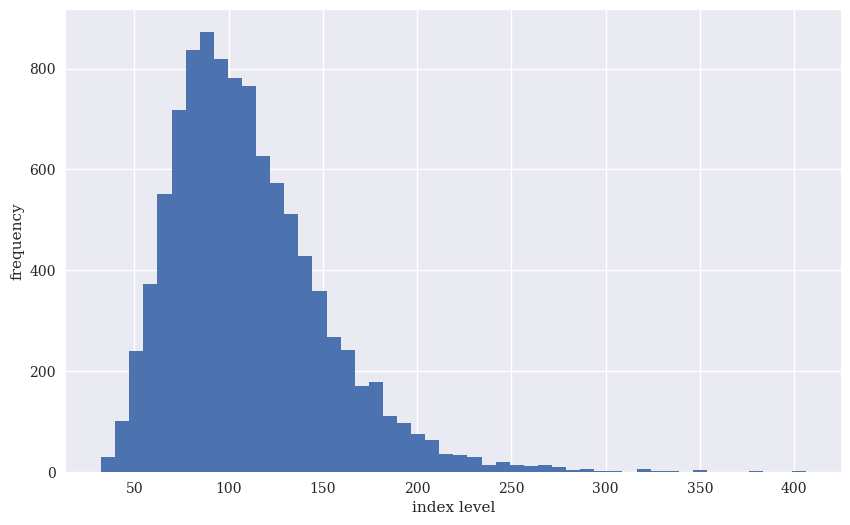

In [7]:
plt.figure( figsize = ( 10, 6 ) )
plt.hist( ST1, bins = 50 )
plt.xlabel( 'index level' )
plt.ylabel( 'frequency' )

# Log normal distribution


You also can use np.random.lognormal

In [8]:
# lognormal是获取对数正态分布 （mean,sigma,size）
ST2 = S0 * np.random.lognormal( ( r - 0.5 * sigma ** 2 ) * T,
                                sigma * np.sqrt( T ), size = I )
ST2

array([100.65905523, 130.33786127,  71.38943031, ...,  62.20959206,
       125.04202158,  95.18986521])

# Compare Two Distribution

In [9]:
import scipy as sp

In [10]:
from scipy import stats

In [11]:
def compare_stats( rn1, rn2 ):
    stats1 = stats.describe( rn1 )
    stats2 = stats.describe( rn2 )
    print( "{:14s} {:14s} {:14s}".format( 'statistic', 'data set 1', 'data set 2' )  )
    print( 45 * "-" )
    print( "{:14s} {:14.3f} {:14.3f}".format( 'size', stats1[0], stats2[0] ) )
    print( "{:14s} {:14.3f} {:14.3f}".format( 'min', stats1[1][0], stats2[1][0] ) )
    print( "{:14s} {:14.3f} {:14.3f}".format( 'max', stats1[1][1], stats2[1][1] ) )
    print( "{:14s} {:14.3f} {:14.3f}".format( 'mean', stats1[2], stats2[2] ) )
    print( "{:14s} {:14.3f} {:14.3f}".format( 'std', stats1[3], stats2[3] ) )
    print( "{:14s} {:14.3f} {:14.3f}".format( 'skew', stats1[4], stats2[4] ) )
    print( "{:14s} {:14.3f} {:14.3f}".format( 'kurtosis', stats1[5], stats2[5] ) )

compare_stats(ST1,ST2)

statistic      data set 1     data set 2    
---------------------------------------------
size                10000.000      10000.000
min                    32.327         28.230
max                   406.124        414.825
mean                  110.663        110.468
std                  1663.857       1621.720
skew                    1.197          1.167
kurtosis                2.773          2.533


# In class exercise: Future Index Time Series in Black Scholes Merton setup

Using step number $M = 100$, time step $ dt = \frac{T}{M} $, repeat above simulation process $M$ times.

$S_{ t+\Delta t } = S_t \exp( ( r - \frac{1}{2}\sigma^2 )\Delta t + \sigma \sqrt{ \Delta t } z )$

In [12]:
M = 100
delta_T = T/M
ST_deltat = ST1 * np.exp( ( r - 0.5 * sigma ** 2 ) *delta_T + \
    sigma * np.sqrt( delta_T ) * np.random.randn( I ) )

In [13]:
S0 = 100
r = 0.05
sigma = 0.25
T = 2.0
I = 10000

M = 100
dt = T/M
S = np.zeros((M+1,I))
S[0] = S0
for t in range(1,M+1):
    S[t]=S[t-1]* np.exp( ( r - 0.5 * sigma ** 2 ) *dt + \
    sigma * np.sqrt( dt ) * np.random.randn( I ) )

S
 

array([[100.        , 100.        , 100.        , ..., 100.        ,
        100.        , 100.        ],
       [ 98.72203748, 101.03201333,  94.77840563, ...,  99.86881352,
        106.78668779, 104.30725032],
       [ 94.44270153, 100.43894496,  99.43141767, ..., 103.30177927,
        106.28341206, 102.89408238],
       ...,
       [152.34477329,  87.37801685,  87.21728969, ...,  75.13973905,
         88.27466846, 121.29395549],
       [150.4383484 ,  85.22398416,  86.94685717, ...,  73.02132115,
         90.37144829, 122.38326264],
       [148.53710673,  87.59669283,  87.01790788, ...,  74.66554838,
         87.90957784, 120.30462923]])

Text(0, 0.5, 'frequency')

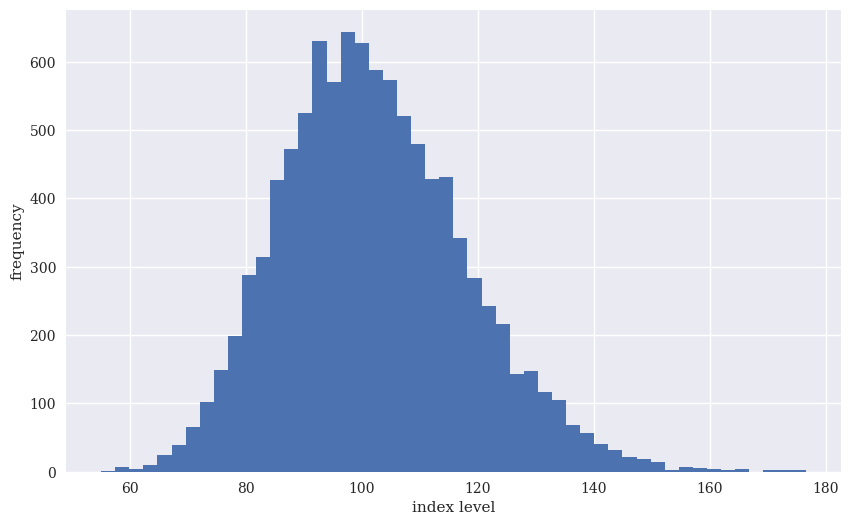

In [14]:
plt.figure( figsize = ( 10, 6 ) )
plt.hist( S[20], bins = 50 )
plt.xlabel( 'index level' )
plt.ylabel( 'frequency' )

Text(0, 0.5, 'index level')

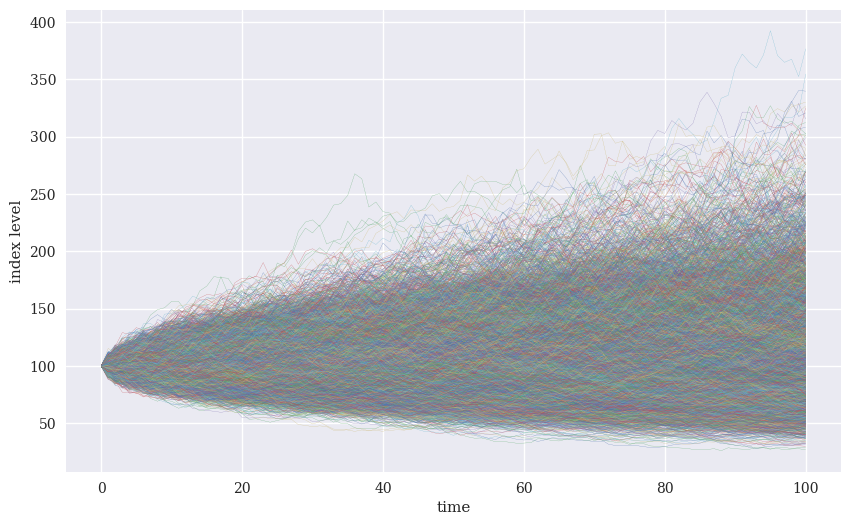

In [15]:
plt.figure( figsize = ( 10, 6 ) )
plt.plot(S[:,:],lw = 0.15)
plt.xlabel( 'time' )
plt.ylabel( 'index level' )

# CIR process

$ dx_t = \kappa ( \theta - x_t ) dt +\sigma \sqrt{ x_t } d Z_t $

# In class exercise: Modified CIR process

$ \tilde{x}_t = \tilde{x}_s + \kappa ( \theta - \tilde{x}^+_s ) \Delta t + \sigma \sqrt{ \tilde{x}^+_s } \sqrt{ \Delta t } z_t  $

$x_t = \tilde{x}^+_t$

In [16]:
x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1
I = 10000
M = 100
T = 2
dt = T/M

In [17]:
def cirprocess( x0, kappa, theta, sigma, I, M, T ):
    dt = T/M
    xh = np.zeros( ( M+1, I ) )
    x = np.zeros_like( xh )
    
    xh[0] = x0
    x[0] = x0
    
    for t in range( 1, M+1 ):
        xh[t] = ( xh[ t - 1 ] + 
                kappa * ( theta - np.maximum( xh[ t - 1 ], 0 ) ) * dt +
                sigma * np.sqrt( np.maximum( xh[ t - 1 ], 0 ) ) *\
                 np.sqrt( dt ) * np.random.standard_normal( I )
                )
    x = np.maximum( xh, 0 )
    return x

x1 = cirprocess(x0,kappa,theta,sigma,I,M,T)
x1

array([[0.05      , 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        0.05      ],
       [0.0495817 , 0.05519066, 0.04737858, ..., 0.04938649, 0.04495034,
        0.04087368],
       [0.05323967, 0.05171301, 0.04555139, ..., 0.04672825, 0.03836399,
        0.03816273],
       ...,
       [0.01082554, 0.02041368, 0.01869344, ..., 0.02634959, 0.01841405,
        0.02392382],
       [0.0126906 , 0.01687965, 0.02011615, ..., 0.02109425, 0.02021262,
        0.02299405],
       [0.01396491, 0.01828589, 0.0214738 , ..., 0.02166323, 0.01938033,
        0.02315819]])

In [18]:
x1.shape

(101, 10000)

Text(0, 0.5, 'frequncy')

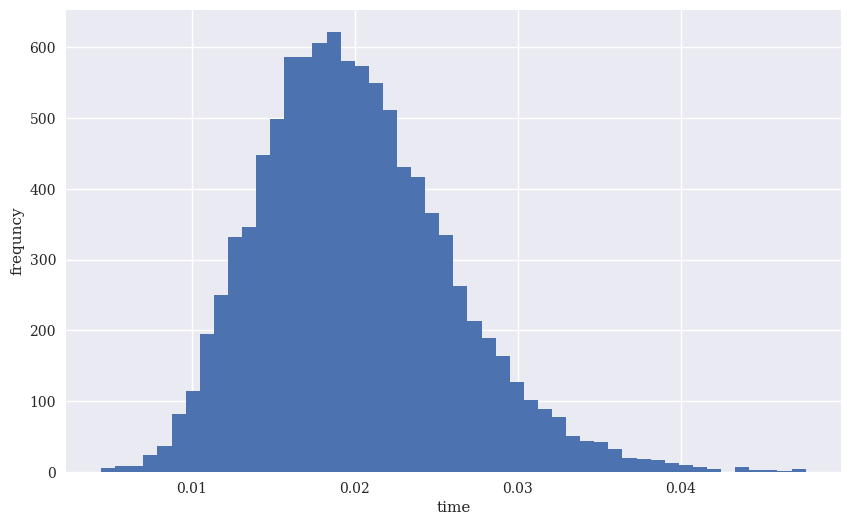

In [19]:
plt.figure(figsize = (10,6))
plt.hist(x1[-1],bins=50)
plt.xlabel('time')
plt.ylabel('frequncy')

Text(0, 0.5, 'index level')

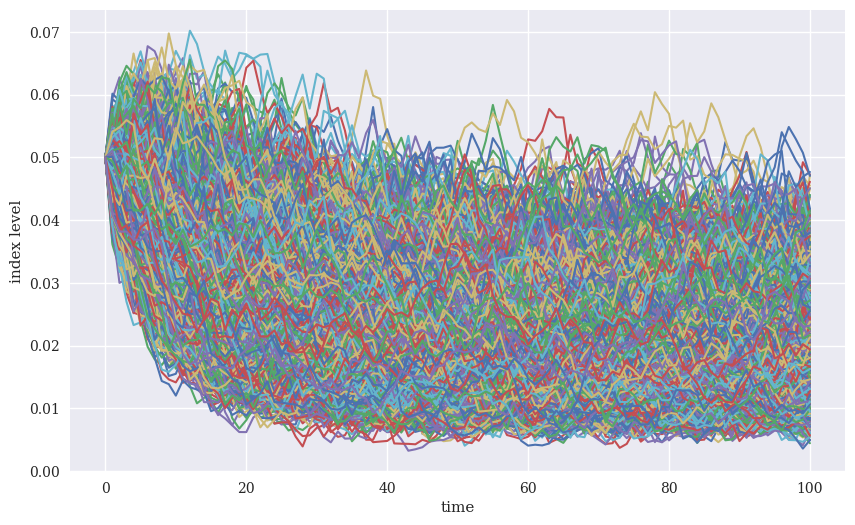

In [20]:
plt.figure( figsize = ( 10, 6 ) )
plt.plot(x1[:,:],lw = 1.5)
plt.xlabel( 'time' )
plt.ylabel( 'index level' )

# Exact Discretization

$df = \frac{4\theta\kappa}{\sigma^2}$

$nc = \frac{ 4 \kappa e^{-\kappa \Delta t} }{ \sigma^2 ( 1 - e^{-\kappa \Delta t} ) } x_s$

$x_t = \frac{ \sigma^2 ( 1 - e^{ -\kappa \Delta t } ) }{ 4\kappa } \chi'^2_d( nc )$ 

$\chi'^2_d$ can be generated by np.random.noncentral_chisquare( df, nc, size )

In [21]:
def exact_srd( x0, kappa, theta, sigma, I, M, T ):
    """
    exact discretization scheme for the square-root diffusion
    """
    dt = T/M
    x = np.zeros( ( M+1, I ) )
    x[0] = x0
    df = 4 * theta * kappa / ( sigma ** 2 )
    for t in range( 1, M+1 ):
        c = ( sigma ** 2 * ( 1 - np.exp( -kappa * dt ) ) ) / ( 4 * kappa )
        nc = np.exp( -kappa * dt ) / c * x[t-1]
        x[t] = c * np.random.noncentral_chisquare( df, nc, I )
    return x

x2 = exact_srd( x0, kappa, theta, sigma, I, M, T )
x2

array([[0.05      , 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        0.05      ],
       [0.04414768, 0.05018346, 0.04765829, ..., 0.04340345, 0.04378737,
        0.05272902],
       [0.04340941, 0.04909025, 0.04657915, ..., 0.04309184, 0.04141254,
        0.05506195],
       ...,
       [0.01269919, 0.01213354, 0.01395861, ..., 0.02238089, 0.01040866,
        0.0159017 ],
       [0.01434189, 0.01345978, 0.01276665, ..., 0.02308862, 0.00841337,
        0.01841755],
       [0.01220702, 0.01204522, 0.01369101, ..., 0.0218666 , 0.0082608 ,
        0.02056972]])

Text(0, 0.5, 'frequncy')

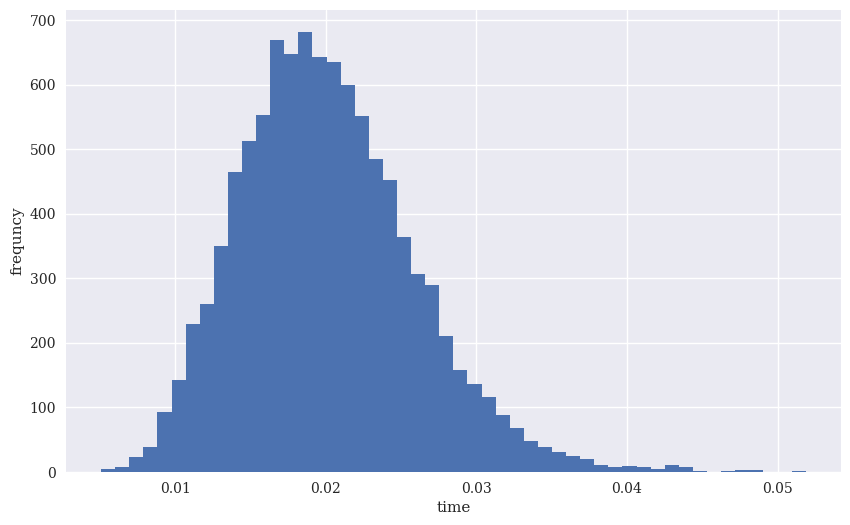

In [22]:
plt.figure(figsize = (10,6))
plt.hist(x2[-1],bins=50)
plt.xlabel('time')
plt.ylabel('frequncy')

Text(0, 0.5, 'index level')

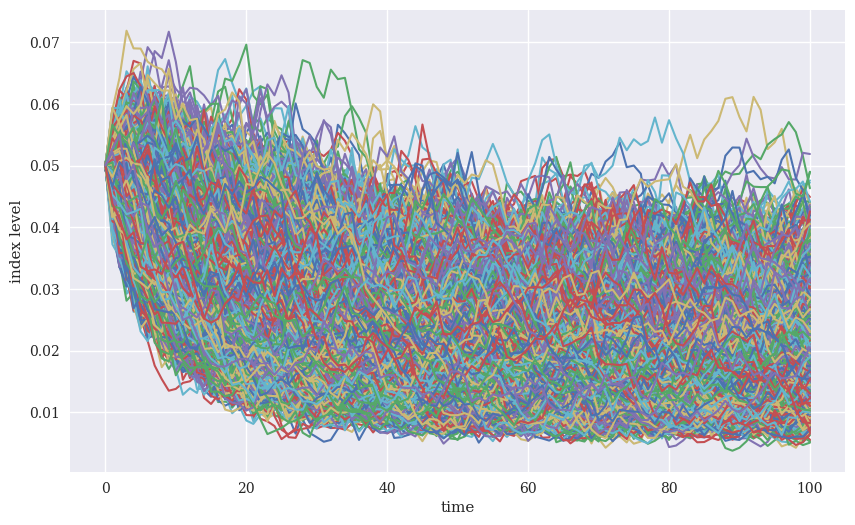

In [23]:
plt.figure( figsize = ( 10, 6 ) )
plt.plot(x2[:,:],lw = 1.5)
plt.xlabel( 'time' )
plt.ylabel( 'index level' )

In [24]:
compare_stats(x1[-1],x2[-1])

statistic      data set 1     data set 2    
---------------------------------------------
size                10000.000      10000.000
min                     0.004          0.005
max                     0.048          0.052
mean                    0.020          0.020
std                     0.000          0.000
skew                    0.604          0.618
kurtosis                0.594          0.799


In [25]:
I = 250000
%time x1 = cirprocess(x0,kappa,theta,sigma,I,M,T)

Wall time: 777 ms


In [26]:
I = 250000
%time x2 = exact_srd( x0, kappa, theta, sigma, I, M, T )

Wall time: 981 ms


# Correlated Normal


How to generate two sequence of random standard normal with correlation $\rho$?

1. Generate an $n\times 2$ matrix of independent standard normals $X$

2. Get Cholesky decomposition component $L$ of correlation matrix $\Omega$. $\Omega = LL'$ ( use package np.linalg.cholesky )

3. $LX$ is the correlated normal with correlation $\rho$.

In [27]:
# L'下三角 L上三角 L'L是正定矩阵
# cov  = (XL)'(XL) = L'X'X'L = L'L   X'X = I
# Cholesky 分解是把一个对称正定的矩阵表示成一个下三角矩阵L和其转置的乘积的分解
rho = 0.6
omega = np.array([[1,rho],[rho,1]])
omega

array([[1. , 0.6],
       [0.6, 1. ]])

In [28]:
cho_mat = np.linalg.cholesky(omega)
cho_mat

array([[1. , 0. ],
       [0.6, 0.8]])

In [29]:
cho_mat.dot(cho_mat.T)

array([[1. , 0.6],
       [0.6, 1. ]])

In [30]:
cho_mat

array([[1. , 0. ],
       [0.6, 0.8]])

In [31]:
res = cho_mat.dot(np.random.randn(2,100000))
res

array([[ 0.13537194, -0.12523193, -0.4829874 , ..., -1.26240482,
        -0.57216044,  0.79693623],
       [-0.18834143, -0.62369416, -0.97181652, ..., -0.52020485,
         0.25734756,  0.70682218]])

In [32]:
np.linalg.lstsq(res[1:].T,res[0].T)[0]

C:\Users\57286\AppData\Local\Temp\ipykernel_18076\3234528311.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(res[1:].T,res[0].T)[0]


array([0.60023027])

# Stochastic Volatility

$dS_t = rS_t dt + \sqrt{ v_t } S_t dZ^1_t$

$dv_t = \kappa_v ( \theta_v - v_t )dt + \sigma_v\sqrt{ v_t } dZ_t^2$

$dZ_t^1 dZ_t^2 = \rho $

In [33]:
S0 = 100
r = 0.05
v0 = 0.1
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6
T = 1
M = 50
I = 10000
dt = T/M

In [34]:
Omega = np.array( [ [1, rho], [rho, 1] ] )
cho_mat = np.linalg.cholesky( Omega )

In [35]:
ran_num = np.random.standard_normal( ( 2, M+1, I ) )
v = np.zeros_like( ran_num[0] )
vh = np.zeros_like( ran_num[0] )
v[0] = v0
vh[0] = v0

for t in range( 1, M+1 ):
    ran = cho_mat.dot( ran_num[ :, t, : ] )
    vh[t] = ( vh[ t - 1 ] + 
            kappa * ( theta - np.maximum( vh[ t - 1 ], 0 ) ) * dt +
            sigma * np.sqrt( np.maximum( vh[ t - 1 ], 0 ) ) * np.sqrt( dt ) * ran[1]
            )    
v = np.maximum( vh, 0 )

In [36]:
S = np.zeros_like( ran_num[0] )
S[0] = S0
for t in range( 1, M + 1 ):
    ran = cho_mat.dot( ran_num[ :, t, : ] )
    S[ t ] = S[ t - 1 ] * np.exp( ( r - 0.5 * v[t] ) * dt + 
                                np.sqrt( v[t] ) * np.sqrt( dt ) * ran[0] )

Text(0, 0.5, 'index level')

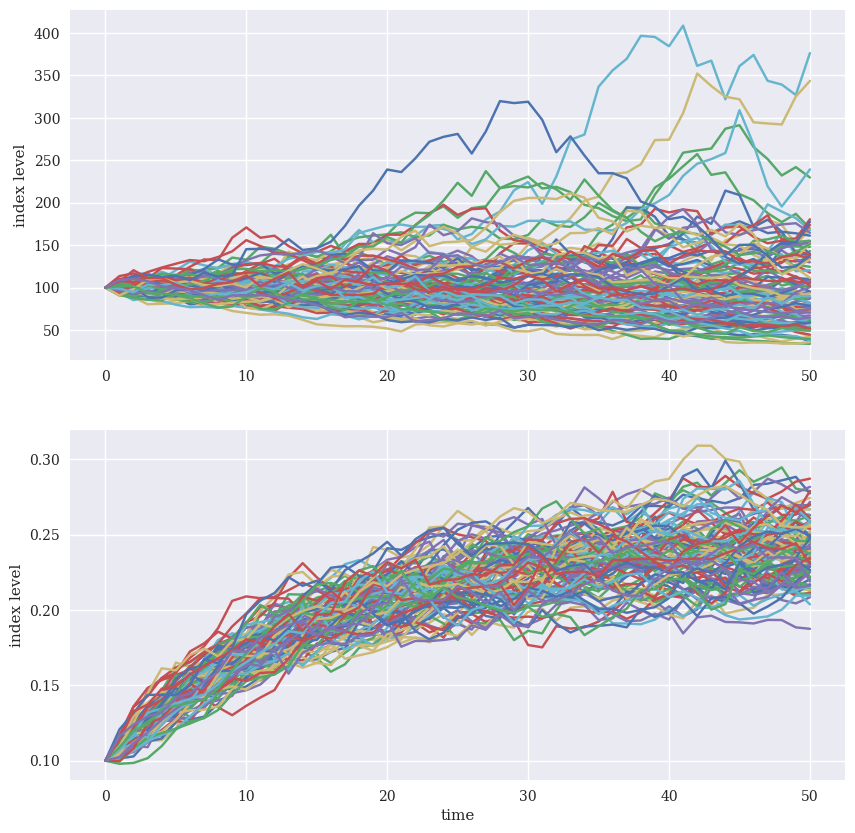

In [37]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (10,10))
ax1.plot(S[:,: 100])
ax1.set_ylabel('index level')
ax2.plot(v[:,: 100])
ax2.set_xlabel('time')
ax2.set_ylabel('index level')

Text(0, 0.5, 'frequncy')

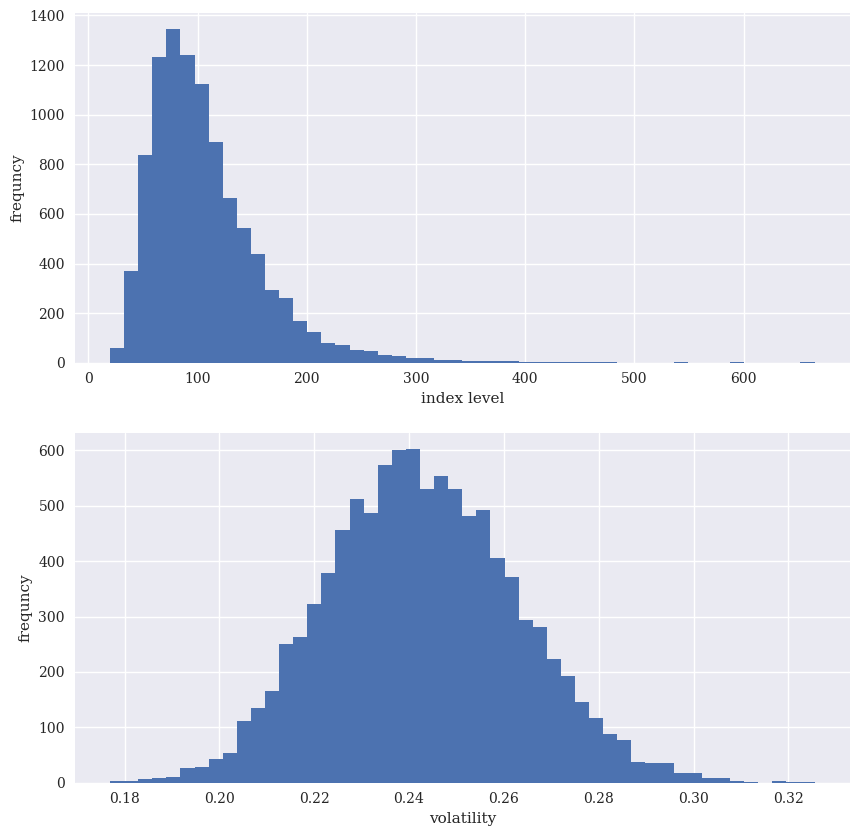

In [38]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (10,10))
ax1.hist(S[-1],bins = 50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequncy')
ax2.hist(v[-1],bins = 50)
ax2.set_xlabel('volatility')
ax2.set_ylabel('frequncy')